<a href="https://colab.research.google.com/github/ADnnx/mIA/blob/master/Univariado/Exp1_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TFM:

Predicción de la calidad del aire en Medellín (Colombia) usando Inteligencia Artificial sobre datos abiertos

: Álvaro Bedoya
UNIR 

TS4-1  
4.2.1 Analisis de serie de tiempo

4.2.3 Predicciones AR

In [ ]:
# Importación de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
#from matplotlib.pylab import rcParams
from pylab import rcParams
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

from pandas import DataFrame
from pandas import concat

import statsmodels.api as sm


In [ ]:
# Obtener el directorio actual
os.getcwd()

'C:\\Users\\Alvaro\\OneDrive\\TFM\\SW\\Univariado'

In [ ]:
# Cargar los datos 
# origen, estación #12 para el año 2018
infile="../../Datos/SIATA/PM25_2018/TR2_estacion_data_txt_12_2018.csv"
nombre_columnas=['Fecha', 'pm25', 'calidad_pm25', 'calidad']
pm25_2018 =  pd.read_csv(infile, delimiter=';', header=0, index_col='Fecha', parse_dates=True, squeeze=True)

In [ ]:
print(pm25_2018.head())
print(type(pm25_2018))

                      PM25  Calidad_pm25
Fecha                                   
2018-01-01 00:00:00 -999.0           151
2018-01-01 01:00:00 -999.0           151
2018-01-01 02:00:00 -999.0           151
2018-01-01 03:00:00 -999.0           151
2018-01-01 04:00:00 -999.0           151
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Candidad de observaciones
print("Total de observaciones: ", pm25_2018.size)

Total de observaciones:  17520


In [ ]:
# Consultando por tiempo
print(pm25_2018['2018-01'])

                      PM25  Calidad_pm25
Fecha                                   
2018-01-01 00:00:00 -999.0           151
2018-01-01 01:00:00 -999.0           151
2018-01-01 02:00:00 -999.0           151
2018-01-01 03:00:00 -999.0           151
2018-01-01 04:00:00 -999.0           151
...                    ...           ...
2018-01-31 19:00:00 -999.0           151
2018-01-31 20:00:00   36.0             1
2018-01-31 21:00:00   42.0             1
2018-01-31 22:00:00   35.0             1
2018-01-31 23:00:00   36.0             1

[744 rows x 2 columns]


In [ ]:
# Estadísticas descriptivas
print(pm25_2018.describe())

              PM25  Calidad_pm25
count  8760.000000   8760.000000
mean    -65.243950     14.493151
std     293.935061     42.919900
min    -999.000000      1.000000
25%      13.000000      1.000000
50%      23.000000      1.000000
75%      35.000000      1.000000
max     112.000000    151.000000


In [ ]:
# Filtrar solo las observaciones "buenas"
serie_pm25 = pm25_2018[pm25_2018.Calidad_pm25 == 1]
serie_pm25.head()
print("Cantidad de solo observaciones buenas", serie_pm25.size)

Cantidad de solo observaciones buenas 15944


In [ ]:
# Crear la serie de tiempos de las observaciones
ts = serie_pm25['PM25']

In [ ]:
#ts['2018-01-01']
ts

Fecha
2018-01-01 05:00:00    98.0
2018-01-01 06:00:00    77.0
2018-01-01 07:00:00    68.0
2018-01-01 08:00:00    62.0
2018-01-01 09:00:00    66.0
                       ... 
2018-12-31 19:00:00    15.0
2018-12-31 20:00:00    12.0
2018-12-31 21:00:00     9.0
2018-12-31 22:00:00    23.0
2018-12-31 23:00:00    28.0
Name: PM25, Length: 7972, dtype: float64

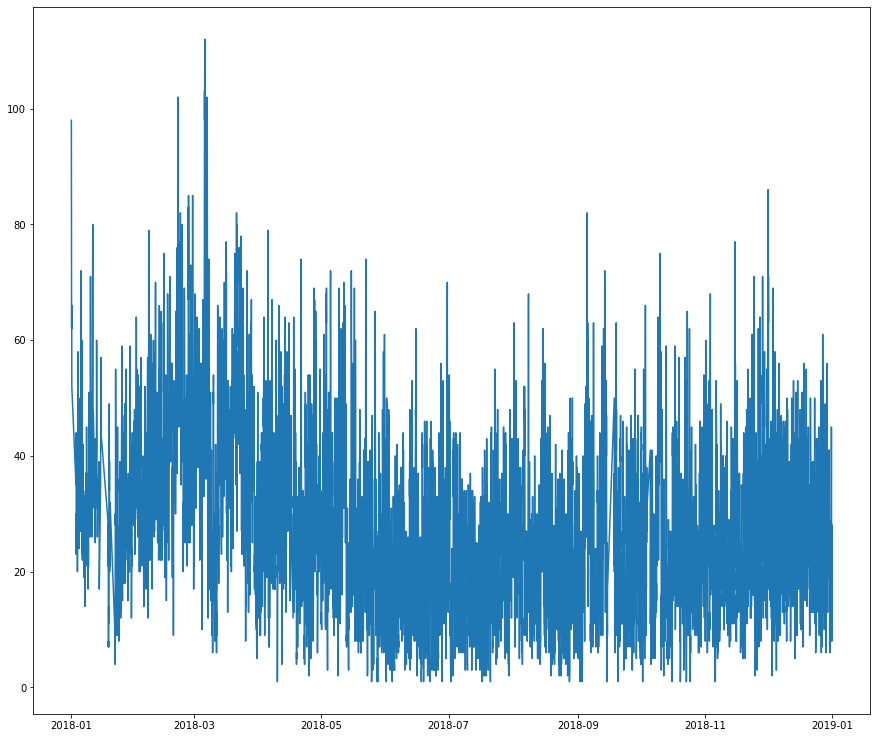

In [ ]:
# Trazar series de tiempo
rcParams['figure.figsize'] = 15, 13
plt.plot(ts)

In [ ]:
y = ts['2018']

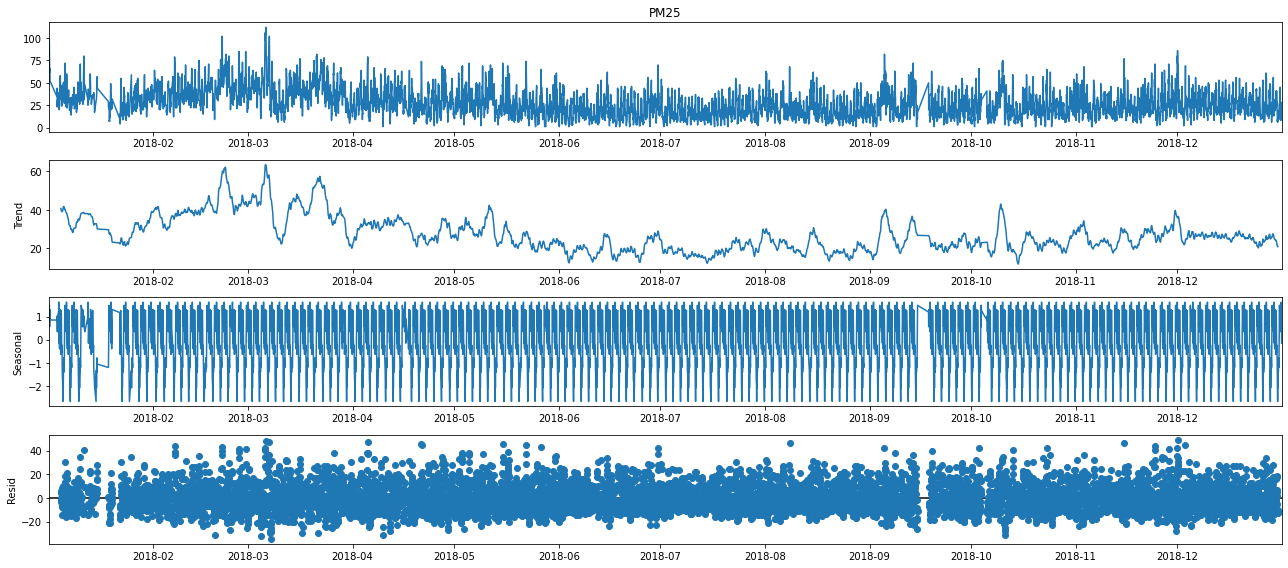

In [ ]:
rcParams['figure.figsize'] = 18, 8

# Descomposión de la serie de tiempos en sus componentes
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=52)
fig = decomposition.plot()
plt.show()

In [ ]:
# Convierte una serie de tiempo en estacionaria
def test_stationarity(timeseries):
    
    # Determinación de estadísticas continuas
    rolmean = timeseries.rolling(window=24).mean() # 24 horas cada día
    rolstd = timeseries.rolling(window=12).std()
    
    # Trazar estadísticas continuas
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Media móvil y desviación estándar')
    plt.show(block=False)
    
    # Realice la prueba Dickey-Fuller
    print ('Resultados de la prueba Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Retrasos utilizados n-lag','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

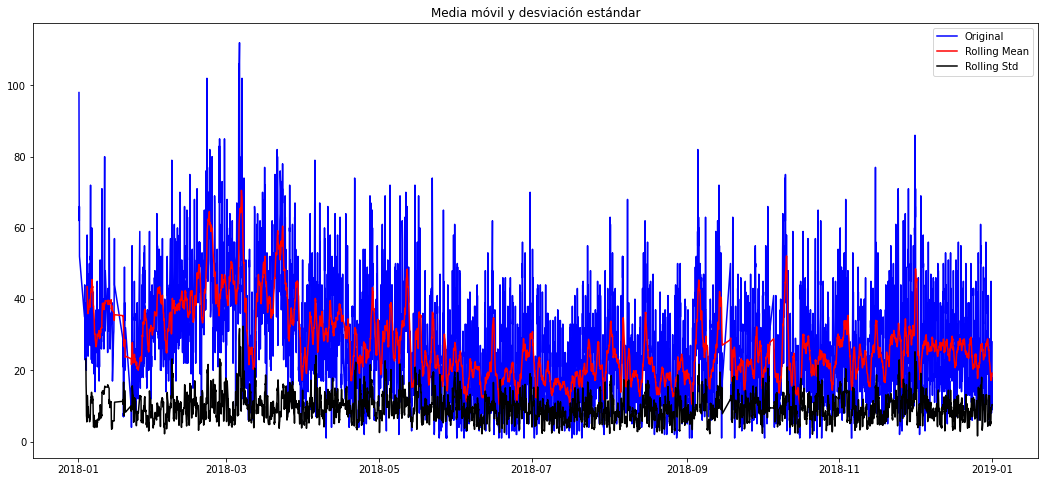

Resultados de la prueba Dickey-Fuller:
Test Statistic                       -7.366173e+00
p-value                               9.224081e-11
#Retrasos utilizados n-lag            2.700000e+01
Número de observaciones utilizadas    7.944000e+03
Critical Value (1%)                  -3.431173e+00
Critical Value (5%)                  -2.861904e+00
Critical Value (10%)                 -2.566964e+00
dtype: float64


In [ ]:
test_stationarity(ts)

In [ ]:
# Prueba ADF -Dickey-Fuller Ampliada
result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
#print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -7.36617272190885
p-value: 9.224080760471398e-11
Critial Values:
   1%, -3.431173440873614
Critial Values:
   5%, -2.8619039015125054
Critial Values:
   10%, -2.56696370010073


In [ ]:
#
series=ts

In [ ]:
# modelo de persistencia
def model_persistence(x):
    return x

In [ ]:
predictions = []
actual = series.values[1:]

In [ ]:
rmse = sqrt(mean_squared_error(actual, predictions))

In [ ]:
actual

array([77., 68., 62., ...,  9., 23., 28.])

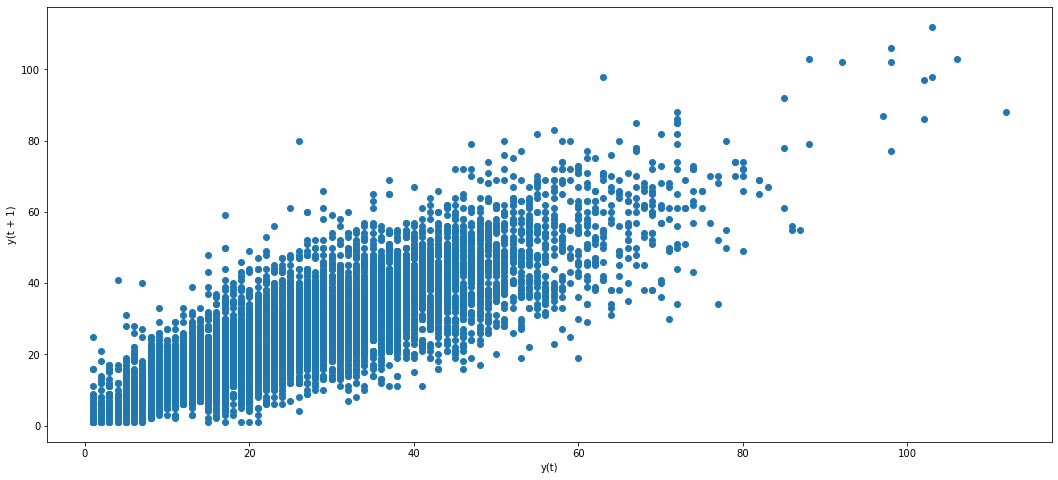

In [ ]:
series = serie_pm25
lag_plot(series)
pyplot.show()
# Trazado de contaminante PM2.5 en el eje x-axis (t) contra PM2.5 del dia anterior (t-1) en el eje y-axis.
# muestra una relación o alguna correlación.

In [ ]:
series=ts

# prueba estadística como el coeficiente de correlación de Pearson.
# Crear un conjunto de datos retrasado
values = pd.DataFrame(series.values)
values
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN  98.0
1  98.0  77.0
2  77.0  68.0
3  68.0  62.0
4  62.0  66.0


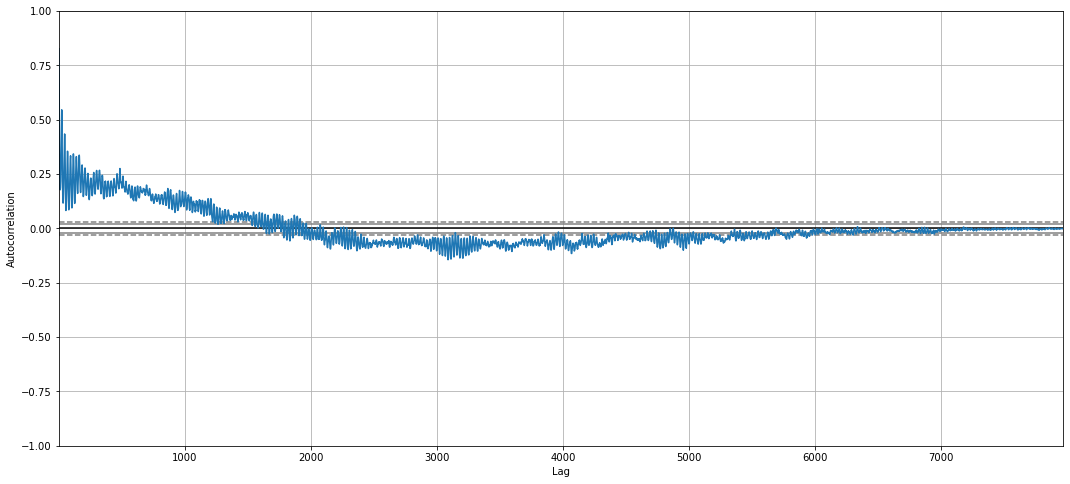

In [ ]:
# Gráficos de autocorrelación
autocorrelation_plot(series)
pyplot.show()

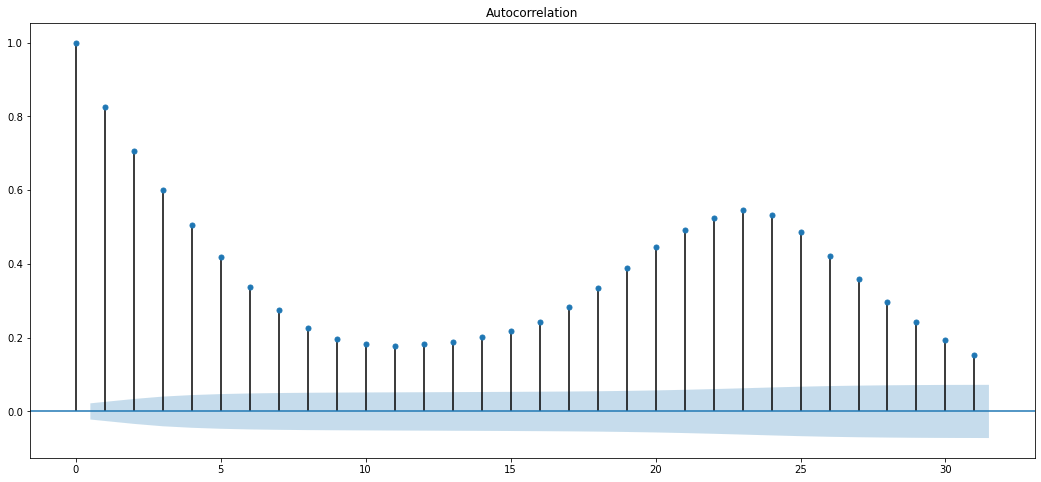

In [ ]:
#
plot_acf(series, lags=31)
pyplot.show()

In [ ]:
# Modelo de persistencia

# crear un conjunto de datos retrasado
values = DataFrame(series.values)

dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


In [ ]:
# modelo de persistencia
def model_persistence(x):
    return x

In [ ]:
# validación de avance "walk-forward"
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# proporciona un rendimiento de referencia para el problema.

Test MSE: 53.286


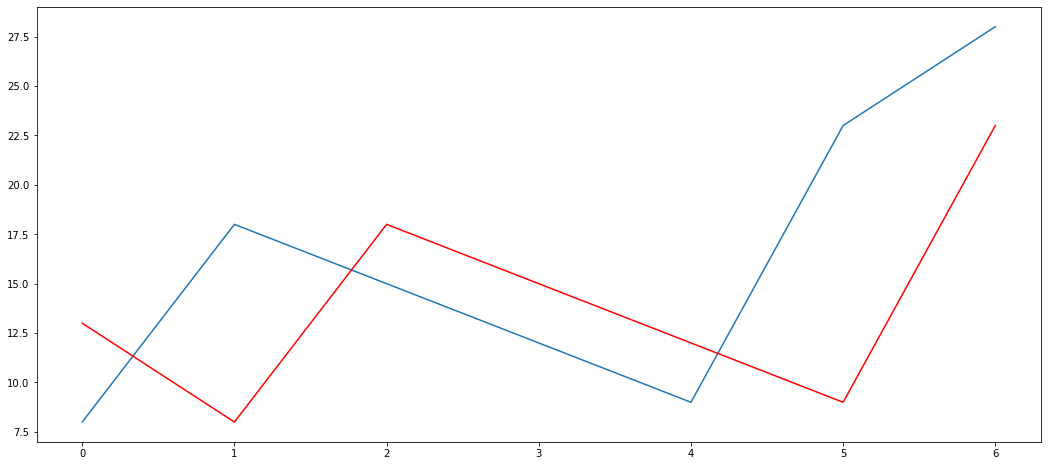

In [ ]:
# Trazado de predicciones vs esperadas 
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

# Predicciones del modelo de persistencia
# Los valores esperados para los próximos 7 días se grafican en azul en comparación con las predicciones del modelo en rojo.

In [ ]:
# Modelo de autorregresión

# Dividir los datos en conjunto de entrenamiento al 70%
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# Entrenar la autorregresión
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# Hacer las predicciones
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# Trazar los resultados
pyplot.plot(test)

pyplot.plot(predictions, color='red', label = 'Predicciones')
pyplot.show()
# Se imprime el pronóstico de 7 días y se resume el error cuadrático medio del pronóstico.
# Se hace un gráfico de los valores esperados en azul frente a los predichos en rojo.

In [ ]:
# Volver a entrenar el modelo AR
# La trayectoria de observaciones, según la formula: yhat = b0 + b1*X1 + b2*X2 ... bn*Xn

# Dividir los datos en conjunto de entrenamiento (70%)
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# entrenar la autorregresión
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# Avanzar pasos de tiempo en el conjunto de pruebas
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
#
print('El error cuadrático medio de los pronósticos es {}'.format(round(np.sqrt(error), 2)))

El error cuadrático medio de los pronósticos es 6.32


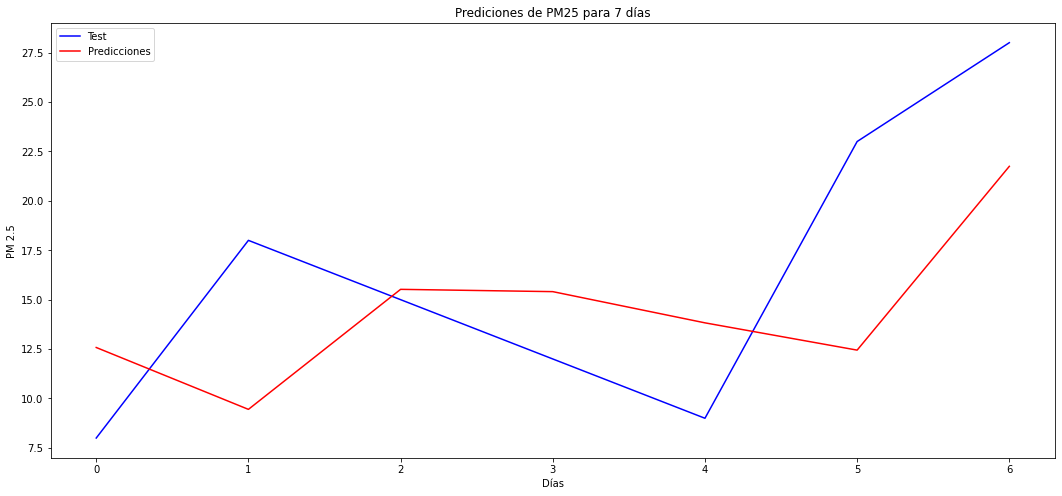

In [ ]:
# Trazado de predicciones
plt.plot(test, color='blue', label='Test')
plt.plot(predictions, color='red', label='Predicciones')
plt.xlabel('Días')
plt.ylabel('PM 2.5')
plt.title('Prediciones de PM25 para 7 días')
pyplot.legend()
plt.show()
# Predicciones del modelo de AR